## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [52]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Loading the dataset from github
student_scores = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
student_scores.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_scores.shape

(25, 2)

### **Exploratory Data Analysis**

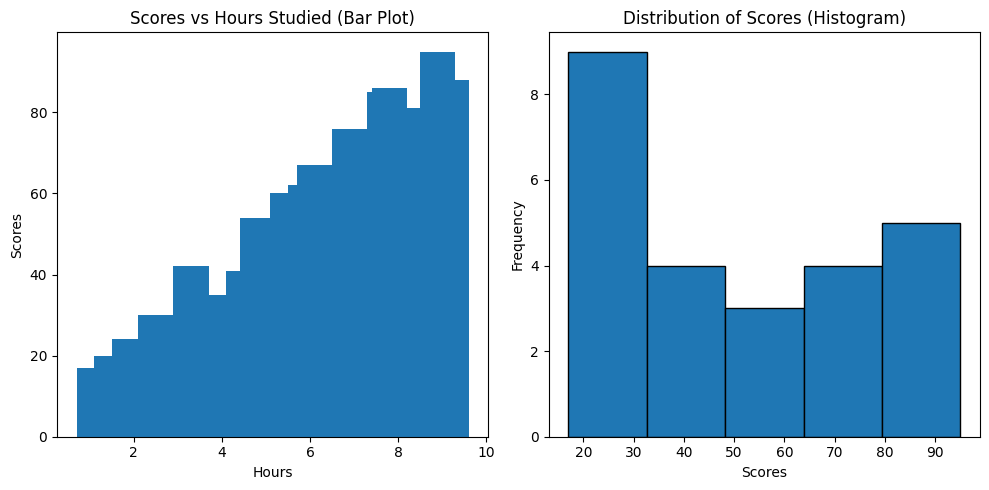

In [56]:
# Plotting the bar plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(student_scores['Hours'], student_scores['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours Studied (Bar Plot)')

# Plotting the histogram
plt.subplot(1, 2, 2)
plt.hist(student_scores['Scores'], bins=5, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores (Histogram)')

plt.tight_layout()
plt.show()

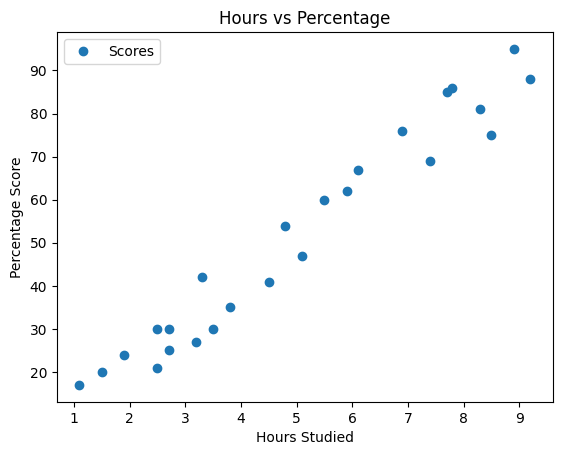

In [10]:
# Plotting the distribution of scores
student_scores.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

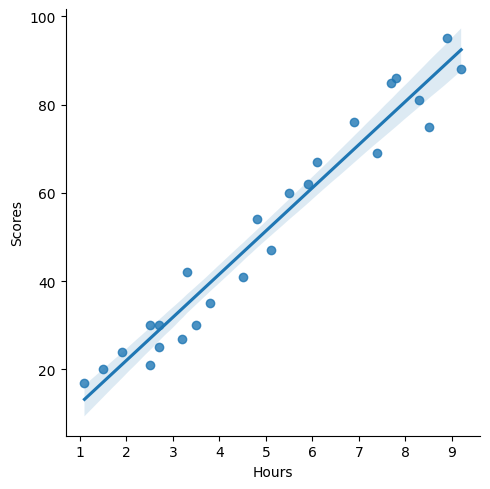

In [25]:
sns.lmplot(x='Hours', y='Scores',data=student_scores)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [40]:
X = student_scores.iloc[:, :-1].values
y = student_scores.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=5)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [42]:
# Create an instance of a LinearRegression() model named regressor
regressor = LinearRegression()

#Train/fit regressor on the training data.
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


In [43]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [9.60498629]


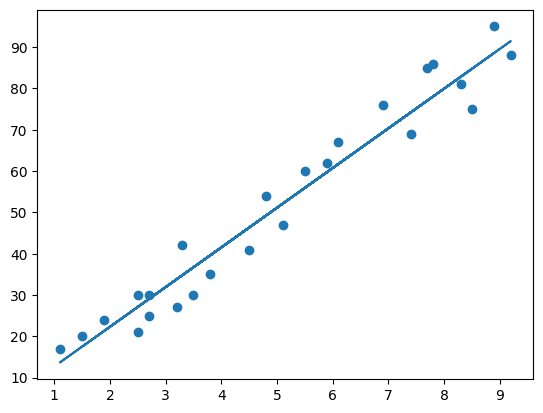

In [44]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [45]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[7.4]
 [6.1]
 [3.2]
 [7.7]
 [4.8]]


In [46]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


In [58]:
# Testing the model with new data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.94416404722054


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

We calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.0124137623905725
Mean Squared Error: 37.563452579516046
Root Mean Squared Error: 6.128903048630811
